k-NN regression
----

- test data의 특정 point p가 있을 때 p의 x 값에 대해, 
- training data 중 그 p의 x값과 k번째까지 가까운 x값을 가지는 points들의 y값들의 평균? 으로 예측하는 듯 하다.

k-NN 에서 중요한 매개변수는 2가지.
- neighbors의 수
- 거리를 재는 방법: 보통은 euclidean 을 사용함.

단점
- 수백 개 이상의 특성을 가진 dataset에는 잘 작동하지 않음.
- 특성 값 대부분이 0인 희소한 데이터셋에는 잘 작동하지 않음.

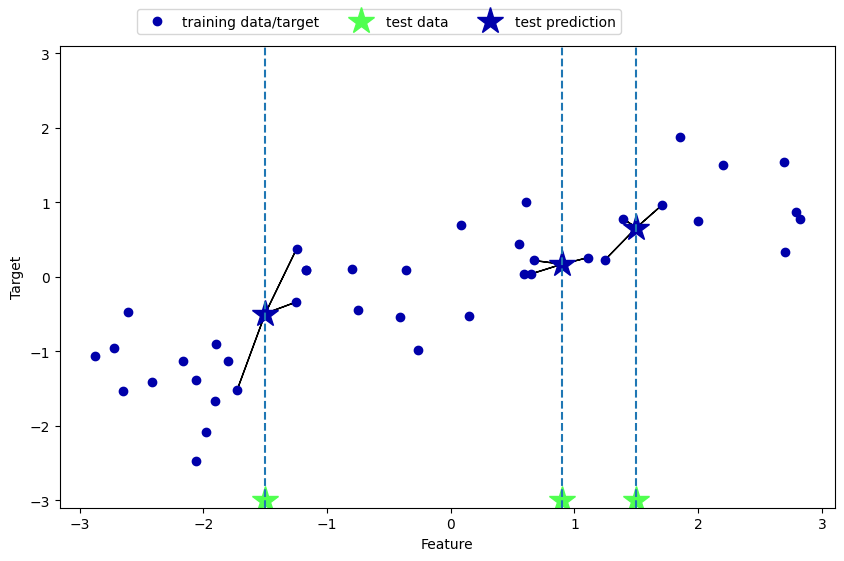

In [4]:
%matplotlib inline
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=3)

### sklearn으로 구현하기.

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)
print("X.shapse, y.shape: {}, {}".format(X.shape, y.shape))

#훈련 데이터와 테스트 데이터로 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.shapse, y.shape: (40, 1), (40,)


In [5]:
#neighbor를 3으로 할 경우
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("test 세트 예측:\n{}".format(reg.predict(X_test)))
print("test 세트 정답:\n{}".format(y_test))


test 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test 세트 정답:
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


모델의 평가를 위해 $R^2$ 값을 사용.

결정 계수라고도 함.

회귀 모델에서의 예측의 적합도를 0과 1 사이로 계산. 1이 완벽, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델.

$SST = \displaystyle\sum_{i=1}^{n} (y_i-\overline{y})^2$

여기서 $\overline{y}$은 실제 y값의 평균, SST는 총 변동

$SSR = \displaystyle\sum_{i=1}^{n} (y_i-\hat{y_i})^2$

여기서 $\hat{y_i}$는 모델로 추정한 값, SSR은 관측값에서 추정값을 뺀 값. 즉 잔차의 총합. 설명 가능한 변동

$R^2 = \frac{SSR}{SST}$

In [8]:
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


### k-NN regression의 분석

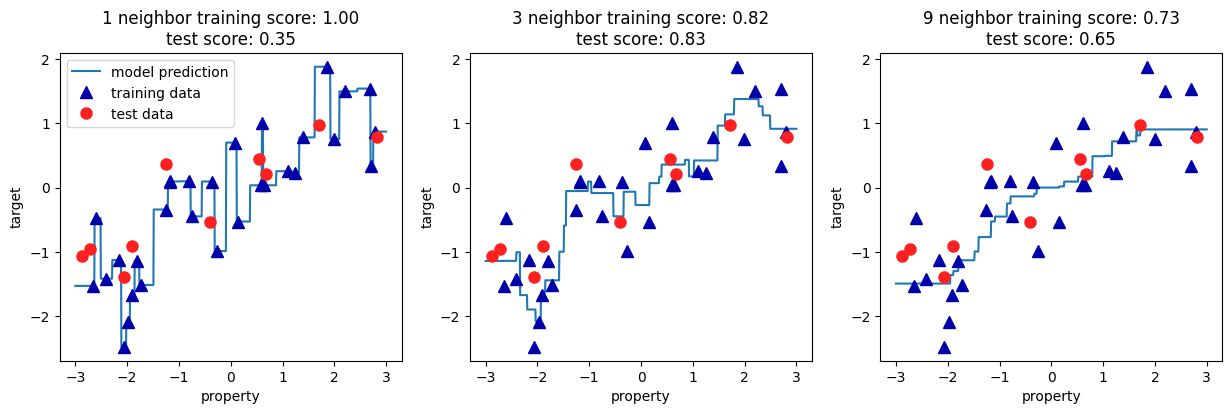

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'o', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbor training score: {:.2f}\ntest score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("property")
    ax.set_ylabel("target")

axes[0].legend(["model prediction", "training data", "test data"], loc="best")
